<a href="https://colab.research.google.com/github/AbnerJSV/THE_CORE/blob/main/iAbasicaDeRopa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [351]:
# 1._ IMPORTAMOS KERAS
!pip install tensorflow
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
3.10.0
GPU Available: []
2.19.0


In [352]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [353]:
print(train_images.shape)

(60000, 28, 28)


In [354]:
# Vemos la matriz de la imagen número 30.000 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[88]))

[[  0   0   0   0   0   0   0   0   0   7   0  24  96  65  71  77  94 106 102  93  92  94  87  75  63  30   0   0]
 [  0   0   0   0   0   0   0   0   0  11   0  94 245 237 255 255 255 255 255 255 255 255 255 236 233 254  10   0]
 [  0   0   0   0   0   0   0   0   0   8   0  66 210 219 228 225 227 226 227 218 216 221 220 217 215 202   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0 103 217 214 233 237 243 243 243 240 234 234 227 214 220 167   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0 212 218 227 237 239 239 238 240 240 235 217 206 217 131   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 217 214 222 240 239 238 237 236 239 230 212 204 249  97   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0 214 214 219 242 238 239 240 232 235 226 213 205 255  80   0   1]
 [  0   0   0   0   0   0   0   0   0   3   0   0 209 211 221 237 238 239 237 233 234 227 212 209 230 118   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0 208 210 218 236 237 238 239 23

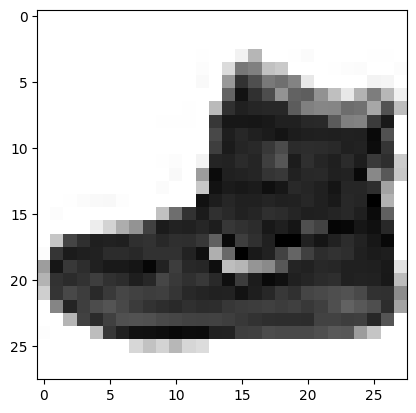

In [355]:
# Veamos el elemento 0 (que vemos que es un 5) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [356]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers

# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
network = models.Sequential()
# Creamos dos capas "Dense", que son capas neuronales densamente conectadas
# (también llamadas "completamente conectadas"). Cada una de las 512 neuronas de
# la capa de entrada están conectadas con los 784 píxeles = 28*28. Solo lo
# definimos para la primera capa. Para la segunda capa y posteriores, Keras lo
# deduce.
network.add(layers.Dense(784, activation='relu', input_shape=(28*28,)))
# Probar 10 neuronas y 'sigmoid' <==============================================
# Capa de salida "softmax" de 10 vías (o neuronas). Significa que
# devolverá una matriz de 10 puntuaciones de probabilidad (sumando 1)
# La puntuación será la probabilidad de que la imagen del dígito actual
# pertenezca a una de nuestras clases de 10 dígitos.
network.add(layers.Dense(10, activation='softmax'))
# Cada capa aplica unas cuantas operaciones con tensores sencillas a los datos
# de entrada, y que estas operaciones implican tensores de pesos. Los tensores
# de peso, que son los atributos de las capas, son donde persiste el
# "conocimiento" de la red.
# En general, la capa de salida de una red de clasificación tendrá tantas
# neuronas como clases, menos en la clasificación binaria, que con 1 vale. Cada
# valor será la probabilidad de que la imagen del dígito actual pertenezca a cada
# una de las clases
network.summary()
# Nombre de las capas automáticos a no ser que lo definamos
# 401.920 = 784 x 512 + 512 Sesgo
# 5.130 = 512x10 + 10 Sesgo
# 407.050 = 401.920 + 5.130

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [357]:
# 4.- HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
# Algoritmo optimizador rmsprop (Root Mean Square Propagation): Es un algoritmo
# similar a AdaGrad (Adaptive Gradient Algorithm) que mantiene un factor de
# entrenamiento diferente para cada dimensión, pero en este caso el escalado
# del factor de entrenamiento se realiza dividiéndolo por la media del declive
# exponencial del cuadrado de los gradientes.
network.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# 'categorical_crossentropy' es la función de pérdida que se utiliza como señal
# de retroalimentación para aprender los tensores de peso y que la fase de
# entrenamiento intentará minimizar
# La reducción de la pérdida se produce mediante el descenso de gradiente
# estocástico minilote, cuyas reglas exactas están gobernadas por el optimizador
# 'rmsprop'
# 'accuracy': Solo tendremos en cuenta la fracción de imágenes que son
# correctamente clasificadas

In [358]:
# 5.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))
print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239
  255 216 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159
  108   0   0   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0
    0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0   0   0   0   0   0   0 171
  135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0   0   0   0   4 171 138 126 120 117 118 102 122
  145 111

In [359]:
# 6.- PREPARACIÓN LAS ETIQUETAS
# from keras import utils
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
# El número 30000 de entrenamiento es un 3

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [360]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
# * epochs: Épocas: un límite arbitrario, definido como
# "una pasada sobre todo el conjunto de datos", que se utiliza para
# separar el entrenamiento en distintas fases, que es útil para el
# registro y la evaluación periódica. Como no hay initial_epoch, en
# este caso va hasta la época 5 desde 1.
# tamaño del lote
# * batch_size: Entero o NULO. Número de muestras por actualización de gradiente.
# Si no se especifica, batch_size se establecerá de forma predeterminada en 32.
network.fit(train_images, train_labels, epochs=20, batch_size=600)
# La red empezará a iterar por lo datos de entrenamiento en minilotes de 128
# muestras, 5 veces (cada iteración por los datos de entrenamiento recibe el
# nombre de "repetición"). En cada iteración, la red computará los gradientes de
# los pesos en relación con la pérdida en el lote y ajustará los pesos en
# consecuencia. Tras estas 5 repeticiones, la red habrá realizado 2.345 ajustes
# de gradiente (469 por repetición), la pérdida será lo bastante baja como para
# que la red sea capaz de clasificar números escritos a mano con gran exactitud.

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5578 - loss: 180.5457
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.7431 - loss: 8.9318
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.7397 - loss: 4.9350
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7955 - loss: 1.1817
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8183 - loss: 0.6939
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8287 - loss: 0.6781
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8437 - loss: 0.5796
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8508 - loss: 0.5192
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8540 - loss: 0.5471
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8598 - loss: 0.4986
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8622 - loss: 0.4674
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━

In [361]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
# Reshape test_images to match the input shape expected by the network
test_images = test_images.reshape((10000, 28 * 28))
test_loss, test_acc = network.evaluate(test_images, test_labels)
# HEMOS UTILIZADO MENOS DE 20 LÍNEAS DE CÓDIGO...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8688 - loss: 0.6484


In [362]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.6299732327461243
test_acc: 0.8687999844551086


In [363]:
# Look at confusion matrix
# Note, this code is taken straight from the SKLEARN website, an nice way of
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[824   0  34  44   9   1  76   0  12   0]
 [  1 963   1  25   5   0   4   0   1   0]
 [  9   1 826   9 105   0  48   0   2   0]
 [ 23   0  19 872  64   0  19   1   2   0]
 [  0   0  97  20 824   0  54   0   5   0]
 [  0   0   0   0   0 945   0  36   2  17]
 [180   1 138  24  92   0 545   0  20   0]
 [  0   0   0   0   0   9   0 980   0  11]
 [  4   1   8   3   7   2   8   5 962   0]
 [  0   0   0   0   0   2   1  50   0 947]]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


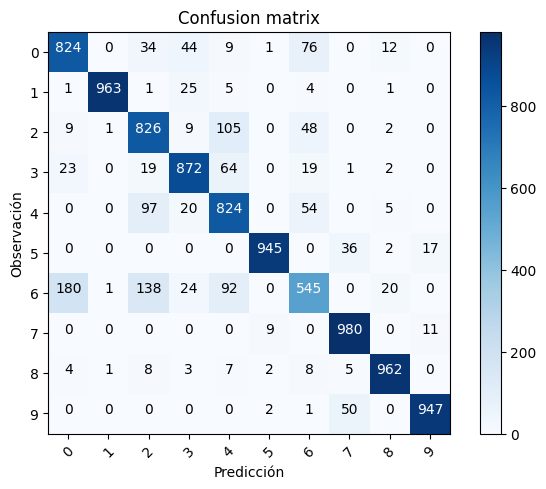

In [364]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding
Y_pred_classes = np.argmax(Y_pred, axis = 1)
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1)
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

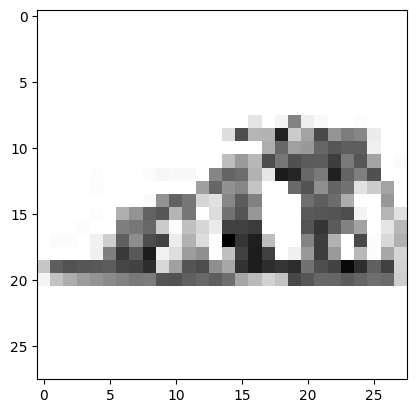

In [365]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[11]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [366]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES===============================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical===========")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6)===========")
print(predictions[11])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6)===========")
print(np.argmax(predictions[11]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 12 DEBERÍA SER 1===")
print(np.sum(predictions[11]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES===============================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical===========
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6)===========
[0.08 0.08 0.11 0.1  0.09 0.12 0.11 0.11 0.11 0.09]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6)===========
5
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 12 DEBERÍA SER 1===
1.0
=PINTAMOS TODAS LAS PREDICCIONES======================================
[[0.08 0.07 0.09 ... 0.14 0.1  0.14]
 [0.11 0.08 0.14 ... 0.07 0.1  0.06]
 [0.09 0.14 0.11 ... 0.06 0.09 0.06]
 ...
 [0.11 0.07 0.12 ... 0.07 0.14 0.06]
 [0.09 0.12 0.1  ... 0.1  0.1  0.08]
 [0.1  0.08 0.11 ... 0.11 0.11 0.09]]


In [367]:
def plot_image(i, predictions_array, true_label_num, img, class_names):
  predictions_array, true_label_num, img = predictions_array, true_label_num[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = class_names[true_label_num]
  predicted_name = class_names[predicted_label]

  if predicted_label == true_label_num:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_name,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label_num, class_names):
  predictions_array, true_label_num = predictions_array, true_label_num[i]
  plt.grid(False)
  plt.xticks(range(len(class_names)), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(len(class_names)), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label_num].set_color('black')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


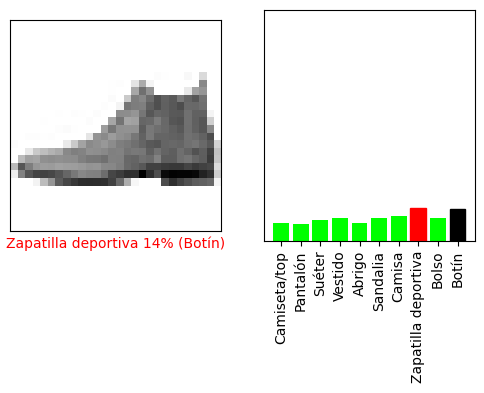

<Figure size 640x480 with 0 Axes>

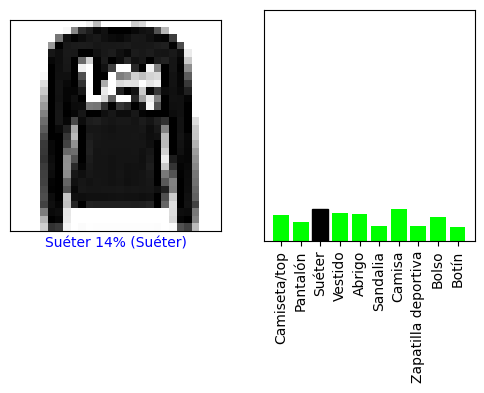

<Figure size 640x480 with 0 Axes>

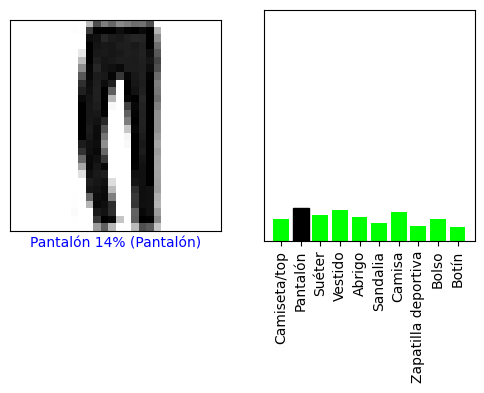

<Figure size 640x480 with 0 Axes>

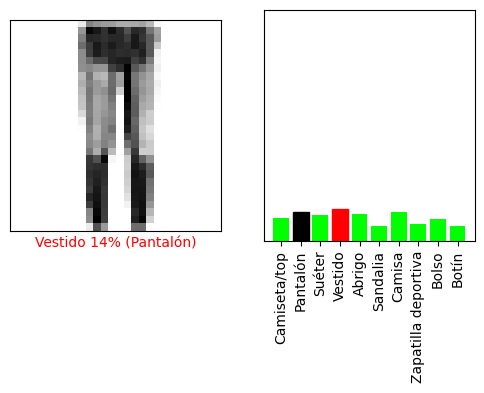

<Figure size 640x480 with 0 Axes>

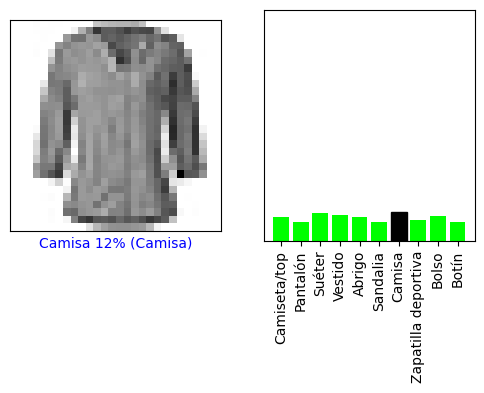

<Figure size 640x480 with 0 Axes>

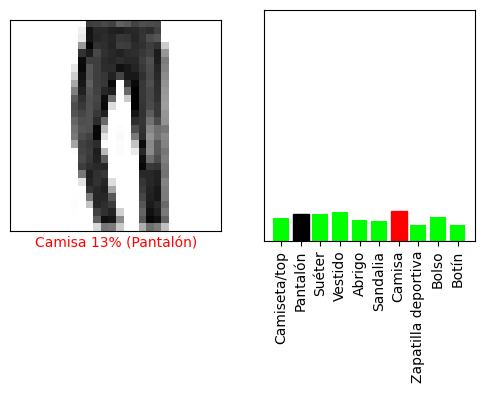

<Figure size 640x480 with 0 Axes>

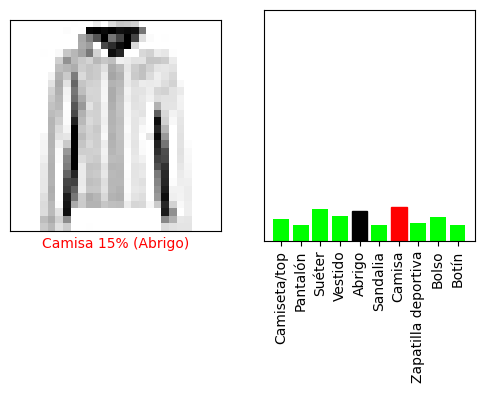

<Figure size 640x480 with 0 Axes>

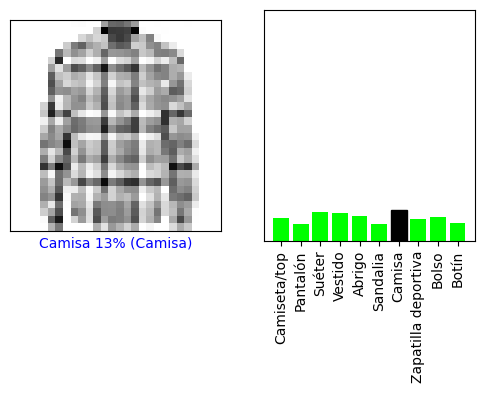

<Figure size 640x480 with 0 Axes>

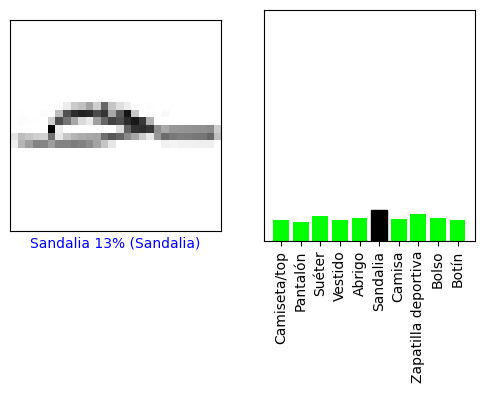

<Figure size 640x480 with 0 Axes>

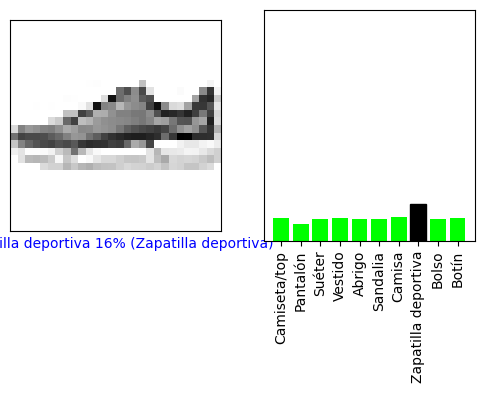

<Figure size 640x480 with 0 Axes>

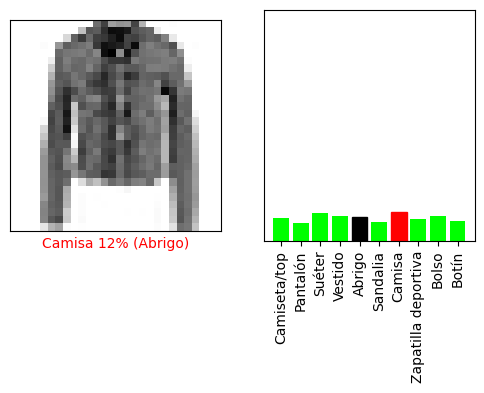

<Figure size 640x480 with 0 Axes>

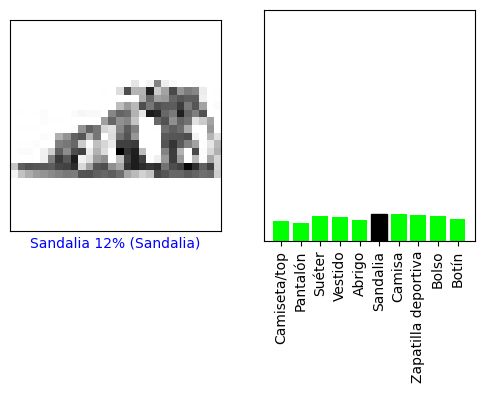

<Figure size 640x480 with 0 Axes>

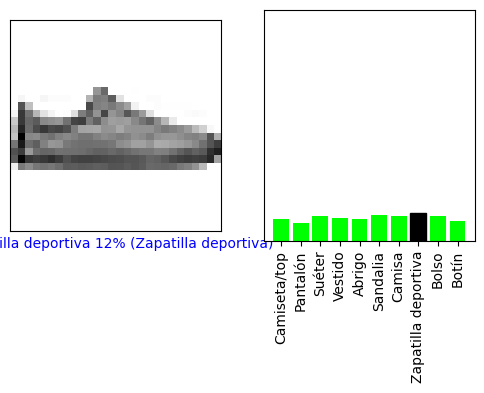

<Figure size 640x480 with 0 Axes>

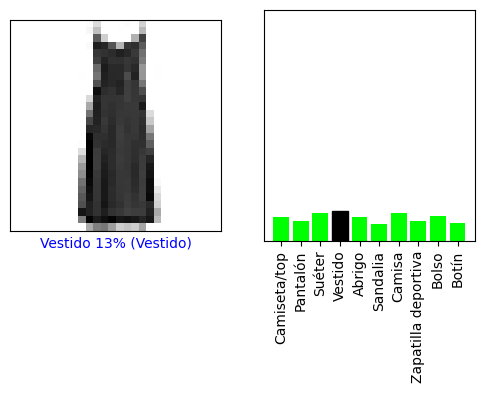

<Figure size 640x480 with 0 Axes>

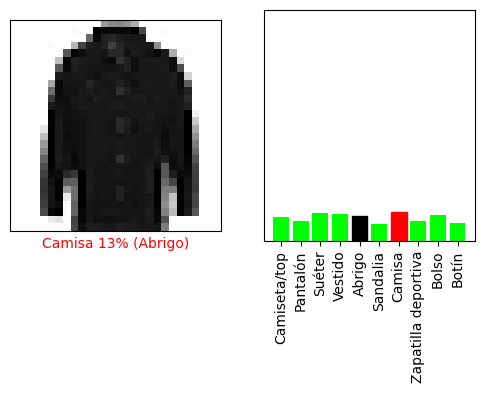

<Figure size 640x480 with 0 Axes>

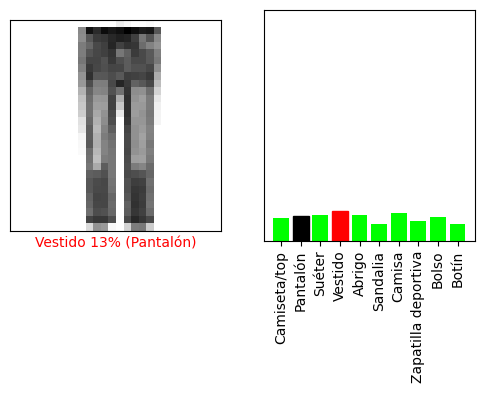

<Figure size 640x480 with 0 Axes>

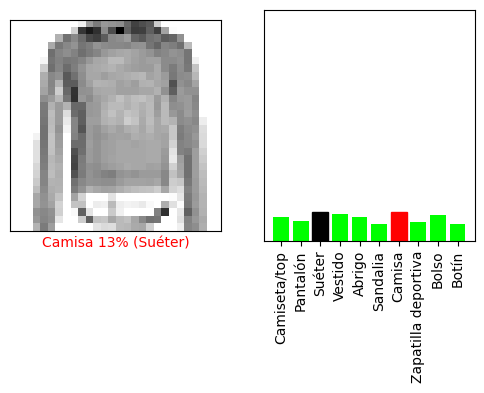

<Figure size 640x480 with 0 Axes>

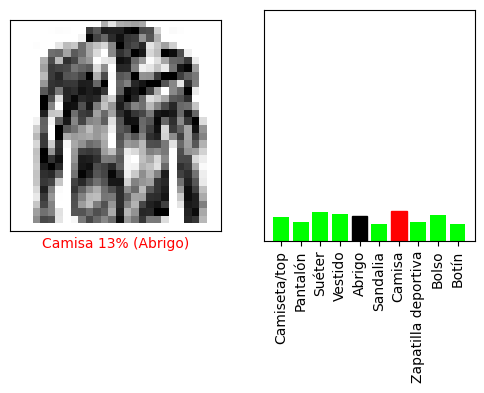

<Figure size 640x480 with 0 Axes>

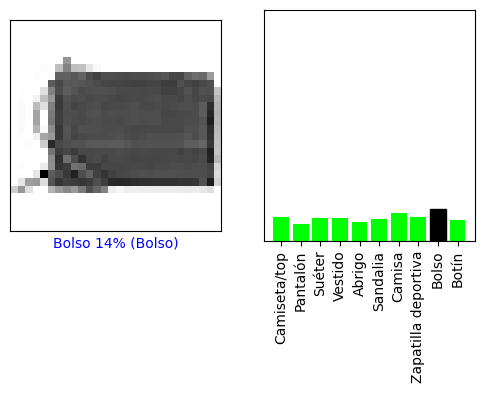

<Figure size 640x480 with 0 Axes>

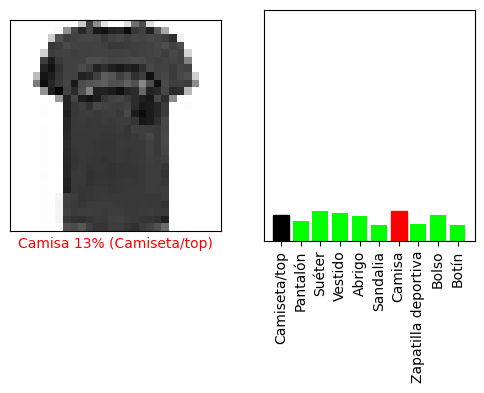

<Figure size 640x480 with 0 Axes>

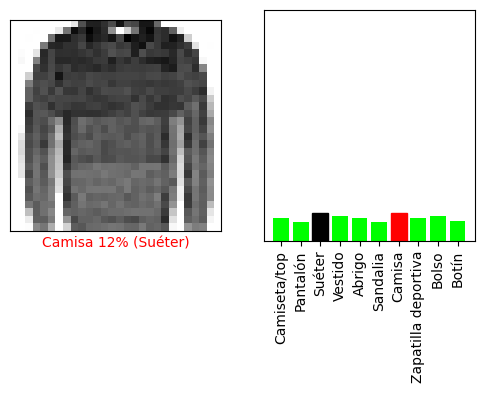

<Figure size 640x480 with 0 Axes>

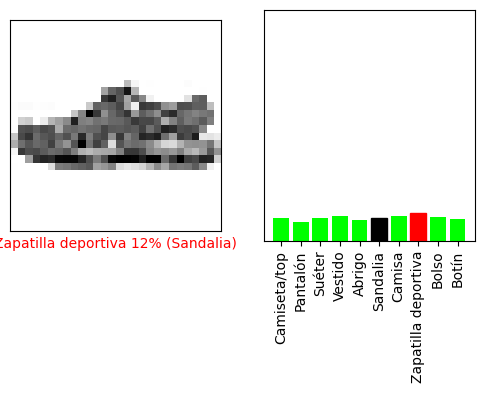

<Figure size 640x480 with 0 Axes>

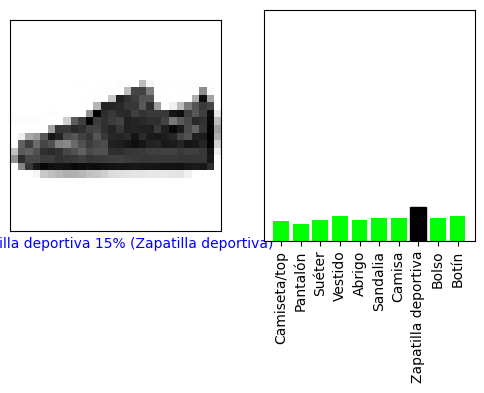

<Figure size 640x480 with 0 Axes>

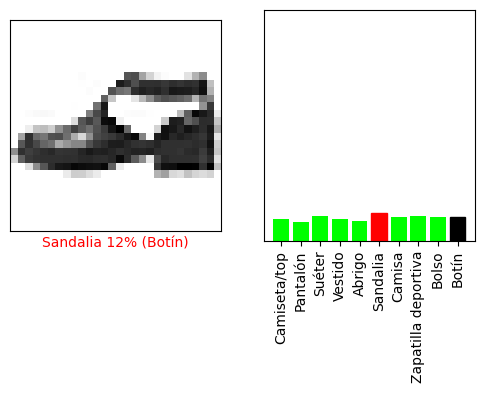

<Figure size 640x480 with 0 Axes>

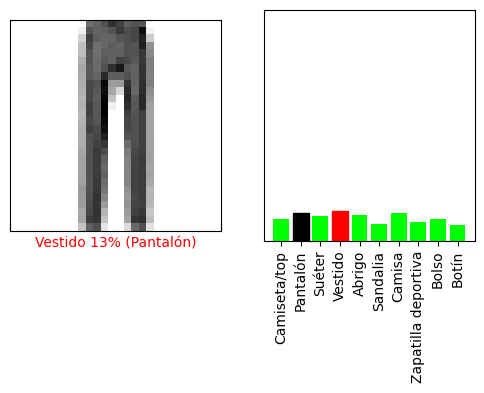

<Figure size 640x480 with 0 Axes>

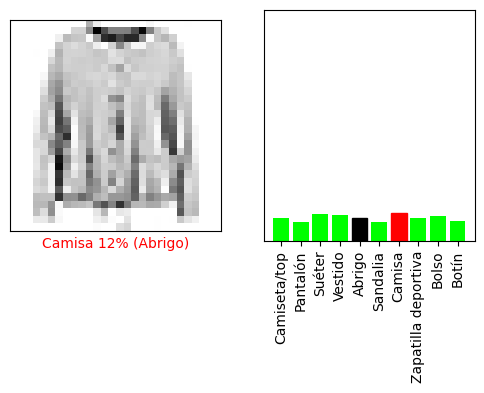

<Figure size 640x480 with 0 Axes>

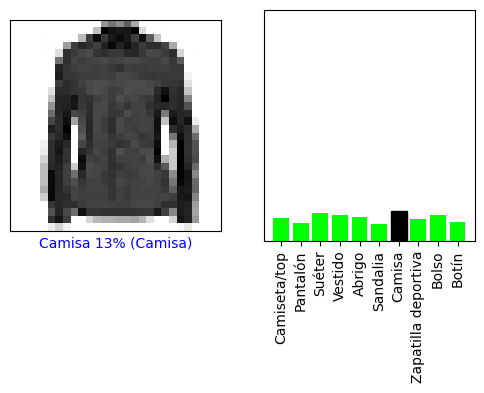

<Figure size 640x480 with 0 Axes>

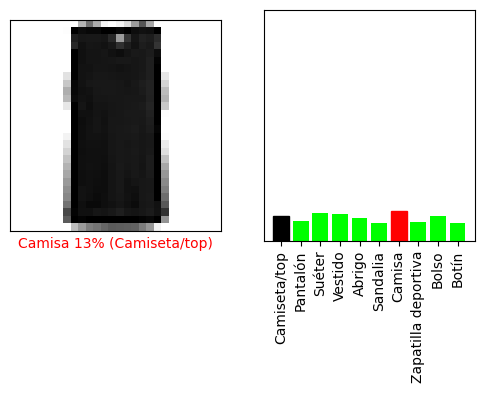

<Figure size 640x480 with 0 Axes>

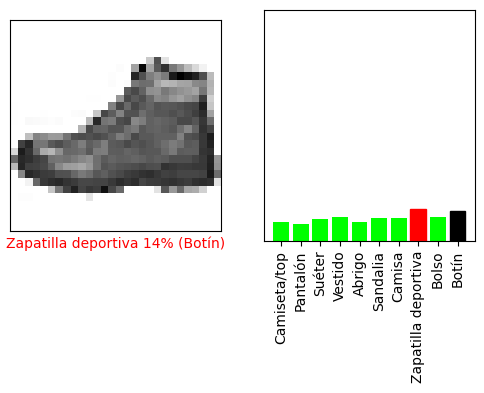

<Figure size 640x480 with 0 Axes>

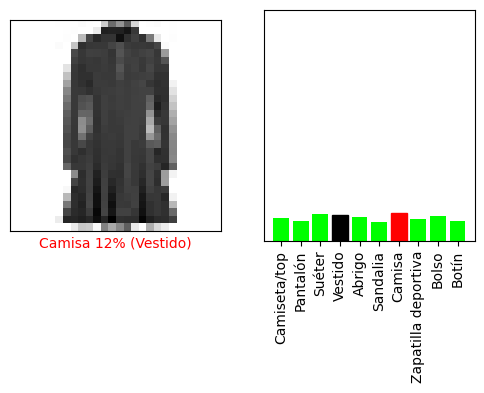

<Figure size 640x480 with 0 Axes>

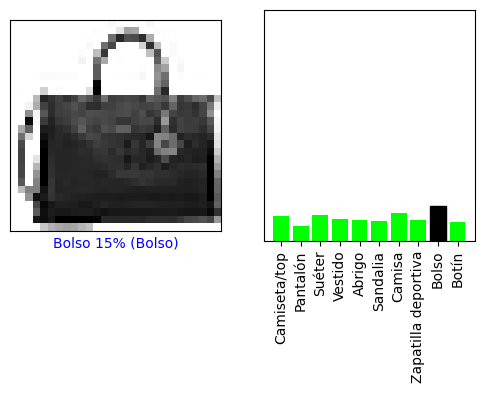

<Figure size 640x480 with 0 Axes>

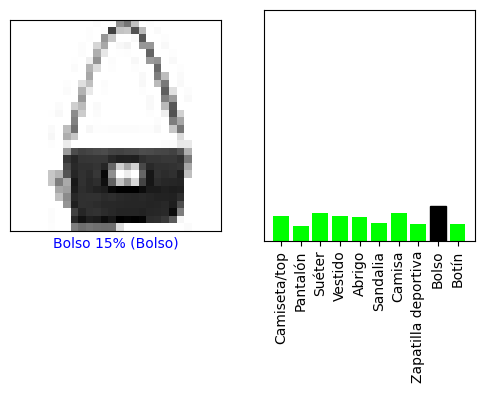

<Figure size 640x480 with 0 Axes>

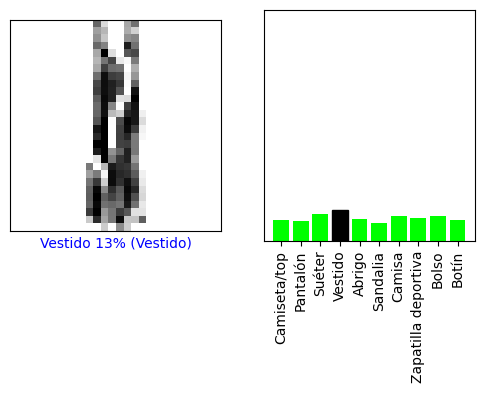

<Figure size 640x480 with 0 Axes>

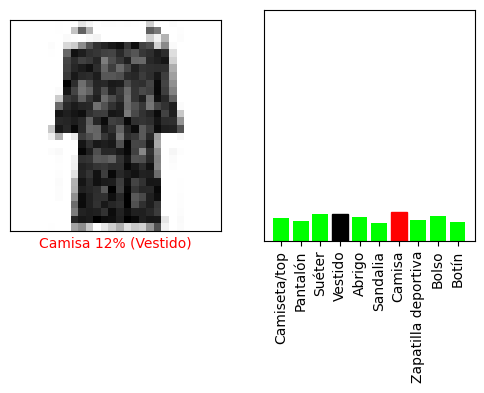

<Figure size 640x480 with 0 Axes>

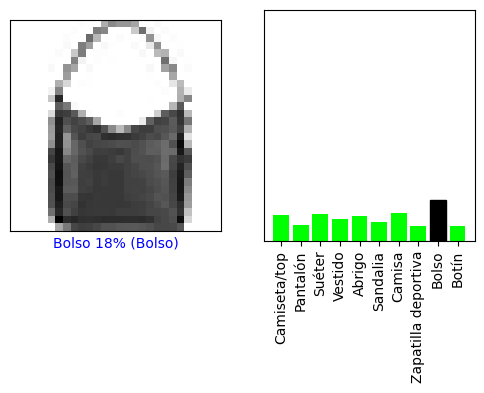

<Figure size 640x480 with 0 Axes>

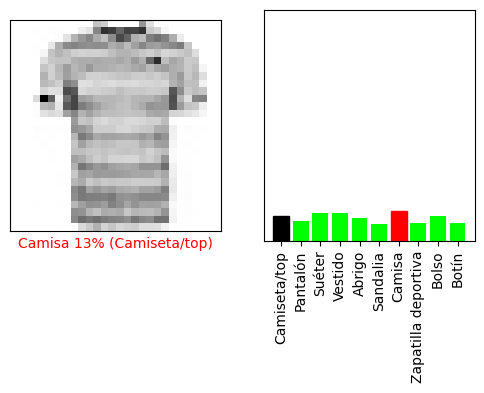

<Figure size 640x480 with 0 Axes>

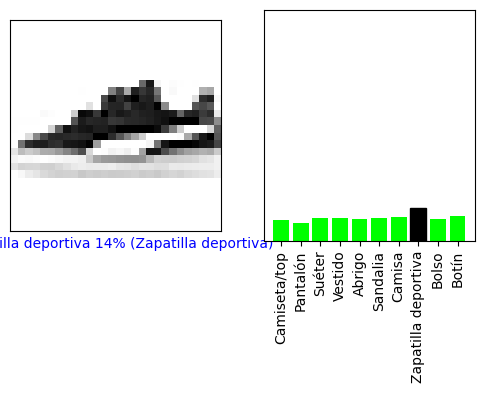

<Figure size 640x480 with 0 Axes>

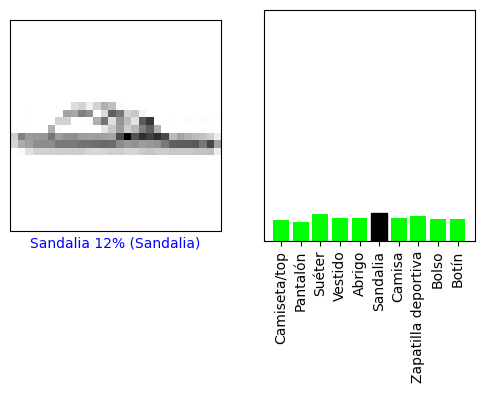

<Figure size 640x480 with 0 Axes>

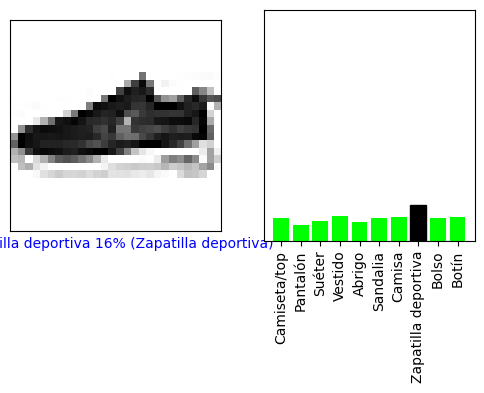

<Figure size 640x480 with 0 Axes>

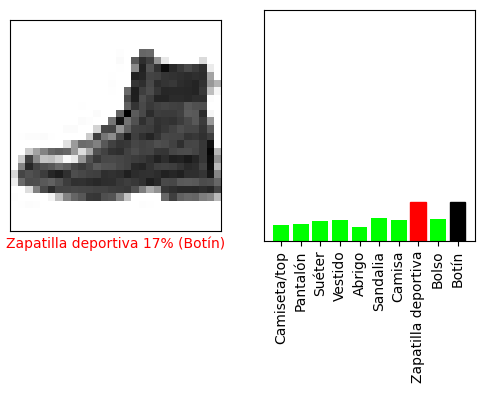

<Figure size 640x480 with 0 Axes>

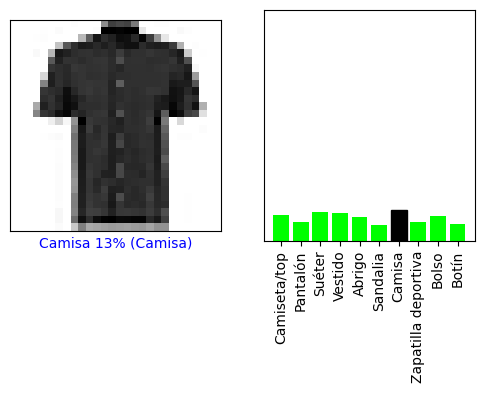

<Figure size 640x480 with 0 Axes>

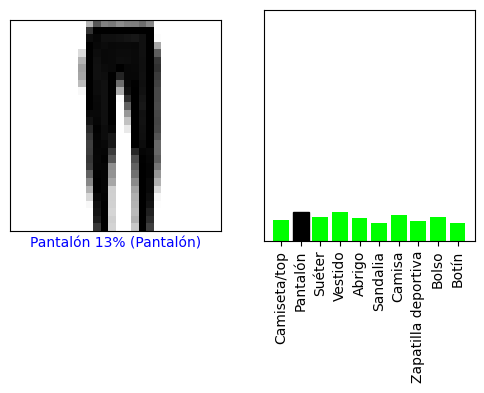

<Figure size 640x480 with 0 Axes>

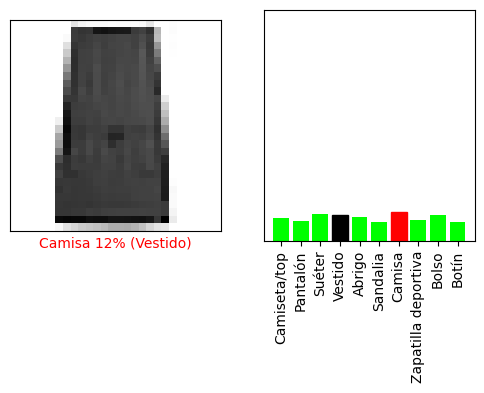

<Figure size 640x480 with 0 Axes>

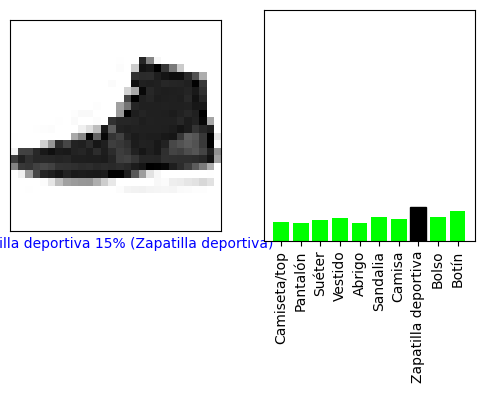

<Figure size 640x480 with 0 Axes>

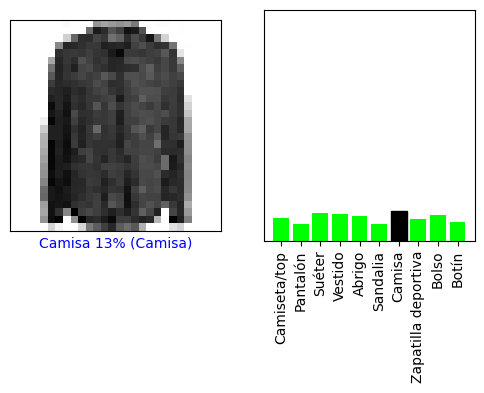

<Figure size 640x480 with 0 Axes>

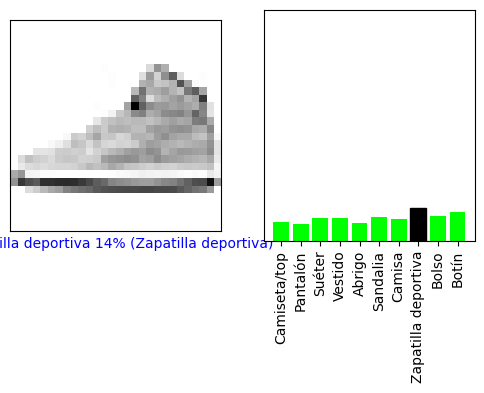

<Figure size 640x480 with 0 Axes>

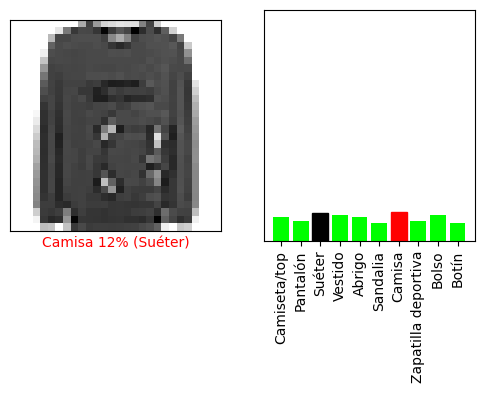

<Figure size 640x480 with 0 Axes>

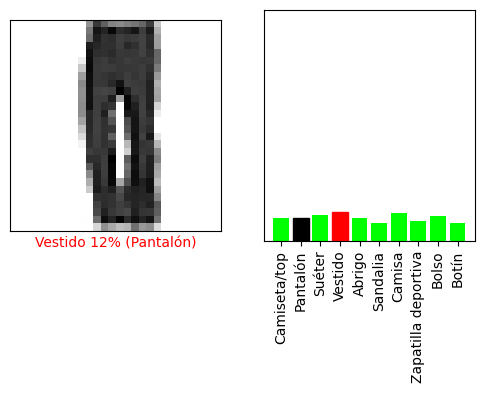

<Figure size 640x480 with 0 Axes>

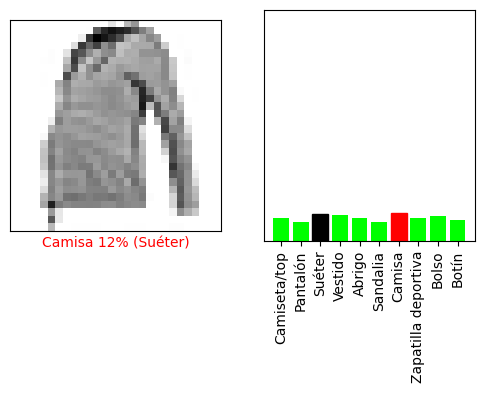

<Figure size 640x480 with 0 Axes>

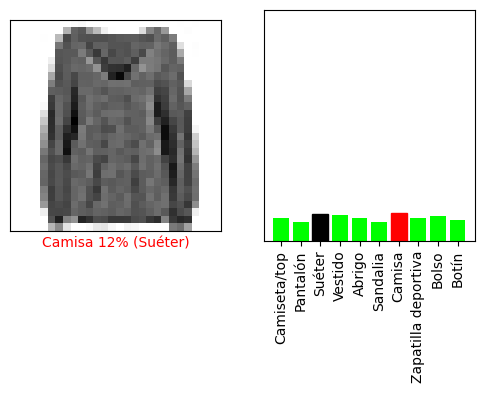

<Figure size 640x480 with 0 Axes>

In [368]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botín']

for i in range(50):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28), class_names)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels, class_names)
  plt.show()
  plt.clf()